In [12]:
import qutip as qt
import numpy as np
import scqubits as scq
import matplotlib.pyplot as plt

In [173]:
tunable_transmon = scq.Transmon(
    EJ = 10, EC= 0.2, ng=0, ncut=6  # GHz  # GHz
)
H = tunable_transmon.hamiltonian(energy_esys=True)
H = qt.Qobj(H) * 2 * np.pi
evals, ekets = H.eigenstates()
psi_g, psi_e = ekets[0], ekets[1]  # basis(2, 0)
sx = psi_g * psi_e.dag() + psi_e * psi_g.dag()
sz = psi_g * psi_g.dag() - psi_e * psi_e.dag()

T1 = 40*1e3
Tphi = 50*1e3
decay_rate = 1/4 * (3/T1 + 2/Tphi)
c_op_list = []
c_op_list.append(np.sqrt(decay_rate) * ekets[0] * ekets[1].dag())

H0 = -0.5 * (evals[1] - evals[0]) * sz
rabi_power = 0.0005 * 2 * np.pi
rabi_freq = 3.7883901904125175 * 2 * np.pi

Hd = rabi_power * sx

Heff = [H0, [Hd, "sin(wd*t)"]]
args = {"wd": (rabi_freq)}
psi0 = psi_g
tlist = np.linspace(0.0, 1e3, 501)
result = qt.mesolve(Heff, psi0, tlist, [c_op_list], [qt.ket2dm(psi_e)], args=args)


mu = 1/4 * np.sqrt(16*rabi_power**2 - (2/Tphi - 1/T1)**2)
pe = 1/2 - 1/2 * np.exp(-1/4 * (3/T1 + 2/Tphi) * tlist)*np.cos(mu*tlist)

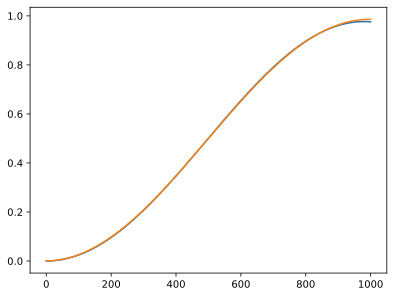

In [174]:
plt.plot(tlist, result.expect[0])
plt.plot(tlist, pe)